In [1]:
# ruff: noqa: E402
%run _common.ipynb
%matplotlib inline
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import lightning
from lightning.pytorch.loggers import WandbLogger

from node_homotopy.training import VanillaTraining
from node_homotopy.experiments.common import make_trainer
from node_homotopy.experiments.double_pendulum import (
    make_pendulum_dataset,
    make_pendulum_model,
)

## 1. Make dataset

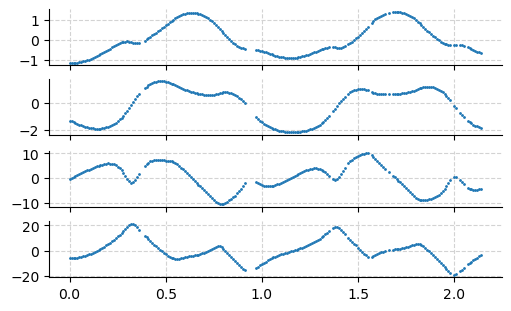

In [2]:
dataset = make_pendulum_dataset(num_timepoints=200)
sample = dataset[0]

fig, axes = plt.subplots(dataset.n_dim, 1, sharex=True, constrained_layout=True)
for i, ax in enumerate(axes):
    ax.plot(sample["t"], sample["u"][i], ".")

## 2. Create model

In [3]:
RANDOM_SEED = 10
lightning.seed_everything(RANDOM_SEED)  # Fix random seed for reproducibility

neuralode = make_pendulum_model("secondorder", nodes_per_layer=32)
training = VanillaTraining(neuralode, lr=5e-3)

Seed set to 10


## 3. Prepare for training

In [4]:
WANDB_PROJECT = "double_pendulum"
WANDB_ENTITY = "jhelab"  # Change to your wandb username/teamname

dataloader = DataLoader(dataset, batch_size=1, num_workers=8, pin_memory=True)

logger = WandbLogger(
    project=WANDB_PROJECT,
    entity=WANDB_ENTITY,
    save_dir=f"../lightning/{WANDB_PROJECT}",
)

# Can also pass None to the logger to only log to the terminal
# logger = None

trainer = make_trainer(max_epochs=4000, logger=logger)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [5]:
trainer.fit(training, dataloader)

You are using a CUDA device ('NVIDIA GeForce RTX 3060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jhko725 (jhelab). Use `wandb login --relogin` to force relogin
wandb: WARNING Path ../lightning/double_pendulum/wandb/ wasn't writable, using system temp directory.
wandb: WARNING Path ../lightning/double_pendulum/wandb/ wasn't writable, using system temp directory


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type                | Params
------------------------------------------------------
0 | model         | SecondOrderBlackbox | 1.3 K 
1 | loss_function | MSELoss             | 0     
------------------------------------------------------
1.3 K     Trainable params
0         Non-trainable params
1.3 K     Total params
0.005     Total estimated model params size (MB)


Epoch 21:   0%|          | 0/1 [00:00<?, ?it/s, v_num=hvud, mse=32.20]        

/home/jhko725/mambaforge/envs/homotopy/lib/python3.11/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
